In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy.stats import norm
from scipy import stats #para box-cox entre otros
from scipy.stats import skew
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.formula.api import ols

### Dealing with the data

Already done in the round 2.

In [26]:
# Cargamos el archivo ya limpio

df= pd.read_csv('marketing_customer_analysis(2).csv')

### EDA (Exploratory Data Analysis) - Complete the following tasks to explore the data:

Already done in the round 2.


In [27]:
df_2= df.copy()

In [28]:
df_2.columns

Index(['unnamed', 'customer', 'state', 'customer lifetime value', 'response',
       'coverage', 'education', 'effective to date', 'employmentstatus',
       'gender', 'income', 'location code', 'marital status',
       'monthly premium auto', 'months since last claim',
       'months since policy inception', 'number of open complaints',
       'number of policies', 'policy type', 'policy', 'renew offer type',
       'sales channel', 'total claim amount', 'vehicle class', 'vehicle size',
       'vehicle type', 'Month'],
      dtype='object')

In [37]:
df_2.shape

(10910, 27)

In [29]:
# Renombrar la columna 'unnamed: 0' a 'unnamed'
df_2.rename(columns={'unnamed: 0': 'unnamed'}, inplace=True)

In [30]:
df_2.info

<bound method DataFrame.info of        unnamed customer       state  customer lifetime value response  \
0            0  DK49336     Arizona              4809.216960       No   
1            1  KX64629  California              2228.525238       No   
2            2  LZ68649  Washington             14947.917300       No   
3            3  XL78013      Oregon             22332.439460      Yes   
4            4  QA50777      Oregon              9025.067525       No   
...        ...      ...         ...                      ...      ...   
10905    10905  FE99816      Nevada             15563.369440       No   
10906    10906  KX53892      Oregon              5259.444853       No   
10907    10907  TL39050     Arizona             23893.304100       No   
10908    10908  WA60547  California             11971.977650       No   
10909    10909  IV32877      Unknow              6857.519928   Unknow   

       coverage education effective to date employmentstatus gender  ...  \
0         Basic

In [31]:
# Visualizamos la columnas que son numericas
df_2._get_numeric_data()

,unnamed,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount,Month
0,0,4809.216960,48029,61,7.000000,52,0.000000,9,292.800000,2
1,1,2228.525238,0,64,3.000000,26,0.000000,1,744.924331,1
2,2,14947.917300,22139,100,34.000000,31,0.000000,2,480.000000,2
3,3,22332.439460,49078,97,10.000000,3,0.000000,2,484.013411,1
4,4,9025.067525,23675,117,15.149071,31,0.384256,7,707.925645,1
...,...,...,...,...,...,...,...,...,...,...
10905,10905,15563.369440,0,253,15.149071,40,0.384256,7,1214.400000,1
10906,10906,5259.444853,61146,65,7.000000,68,0.000000,6,273.018929,1
10907,10907,23893.304100,39837,201,11.000000,63,0.000000,2,381.306996,2
10908,10908,11971.977650,64195,158,0.000000,27,4.000000,6,618.288849,2


In [32]:
df_2.describe

<bound method NDFrame.describe of        unnamed customer       state  customer lifetime value response  \
0            0  DK49336     Arizona              4809.216960       No   
1            1  KX64629  California              2228.525238       No   
2            2  LZ68649  Washington             14947.917300       No   
3            3  XL78013      Oregon             22332.439460      Yes   
4            4  QA50777      Oregon              9025.067525       No   
...        ...      ...         ...                      ...      ...   
10905    10905  FE99816      Nevada             15563.369440       No   
10906    10906  KX53892      Oregon              5259.444853       No   
10907    10907  TL39050     Arizona             23893.304100       No   
10908    10908  WA60547  California             11971.977650       No   
10909    10909  IV32877      Unknow              6857.519928   Unknow   

       coverage education effective to date employmentstatus gender  ...  \
0         Bas

In [33]:
# Seleccionar todas las columnas categóricas
df_2_object= df_2.select_dtypes(include=['object', 'category'])
df_2_numerical= df_2.select_dtypes(np.number)

1.7 DATA PREPROCESSING

Review multivariate linear regression model and its assumptions on independent variables

Using EDA to check the assumptions in a linear regression model

Checking normality assumption (for the residuals)
Check skewness in the data
Managing skewness in the data

In [34]:
df_2_numerical

,unnamed,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount,Month
0,0,4809.216960,48029,61,7.000000,52,0.000000,9,292.800000,2
1,1,2228.525238,0,64,3.000000,26,0.000000,1,744.924331,1
2,2,14947.917300,22139,100,34.000000,31,0.000000,2,480.000000,2
3,3,22332.439460,49078,97,10.000000,3,0.000000,2,484.013411,1
4,4,9025.067525,23675,117,15.149071,31,0.384256,7,707.925645,1
...,...,...,...,...,...,...,...,...,...,...
10905,10905,15563.369440,0,253,15.149071,40,0.384256,7,1214.400000,1
10906,10906,5259.444853,61146,65,7.000000,68,0.000000,6,273.018929,1
10907,10907,23893.304100,39837,201,11.000000,63,0.000000,2,381.306996,2
10908,10908,11971.977650,64195,158,0.000000,27,4.000000,6,618.288849,2


In [38]:
df_2_numerical.head()

,unnamed,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount,Month
0,0,4809.216960,48029,61,7.000000,52,0.000000,9,292.800000,2
1,1,2228.525238,0,64,3.000000,26,0.000000,1,744.924331,1
2,2,14947.917300,22139,100,34.000000,31,0.000000,2,480.000000,2
3,3,22332.439460,49078,97,10.000000,3,0.000000,2,484.013411,1
4,4,9025.067525,23675,117,15.149071,31,0.384256,7,707.925645,1


In [35]:
#OLS Regression Results  

Y=df_2_numerical['total claim amount']
X=df_2_numerical.drop(['total claim amount'], axis=1)
x=sm.add_constant(X)
model=sm.OLS(Y,X).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:     total claim amount   R-squared (uncentered):                   0.850
Model:                            OLS   Adj. R-squared (uncentered):              0.850
Method:                 Least Squares   F-statistic:                              6877.
Date:                Sun, 14 May 2023   Prob (F-statistic):                        0.00
Time:                        13:14:34   Log-Likelihood:                         -73434.
No. Observations:               10910   AIC:                                  1.469e+05
Df Residuals:                   10901   BIC:                                  1.470e+05
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------

C:\Users\aguva\AppData\Local\Temp\ipykernel_8748\1421801117.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_2_numerical[columns])


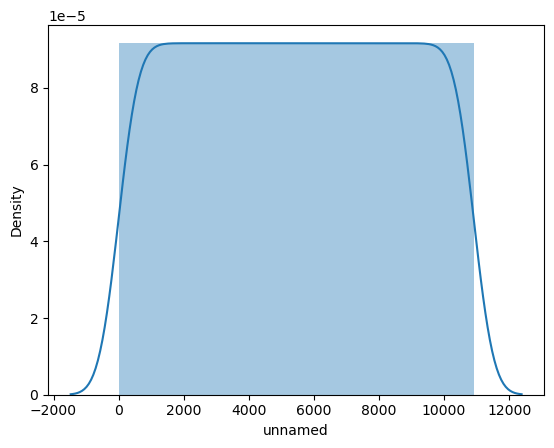

C:\Users\aguva\AppData\Local\Temp\ipykernel_8748\1421801117.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_2_numerical[columns])


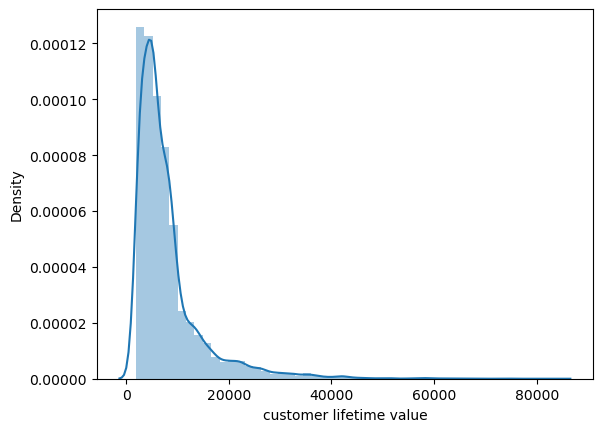

C:\Users\aguva\AppData\Local\Temp\ipykernel_8748\1421801117.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_2_numerical[columns])


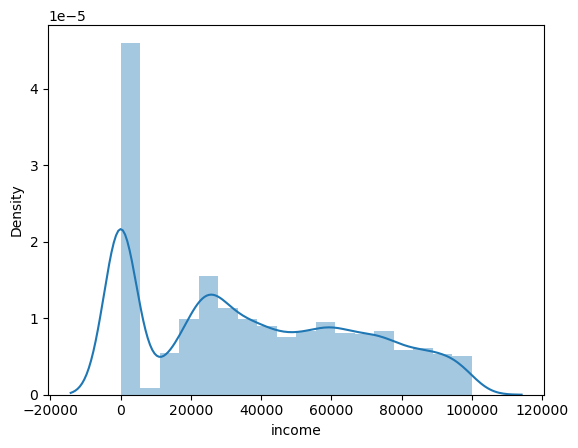

C:\Users\aguva\AppData\Local\Temp\ipykernel_8748\1421801117.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_2_numerical[columns])


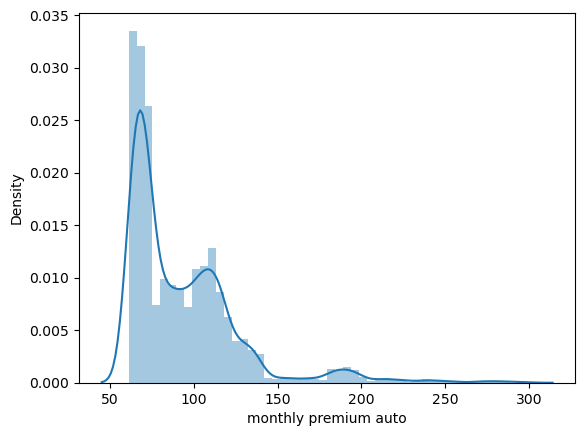

C:\Users\aguva\AppData\Local\Temp\ipykernel_8748\1421801117.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_2_numerical[columns])


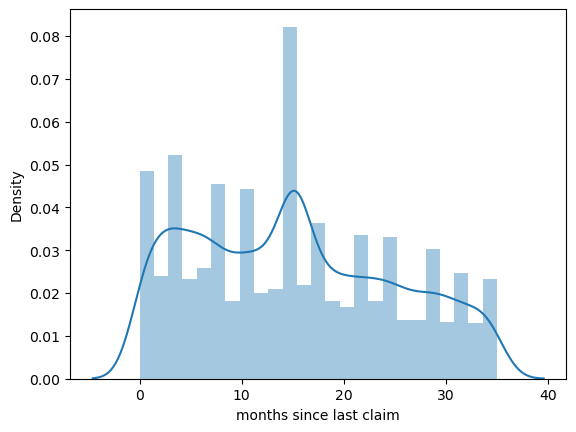

C:\Users\aguva\AppData\Local\Temp\ipykernel_8748\1421801117.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_2_numerical[columns])


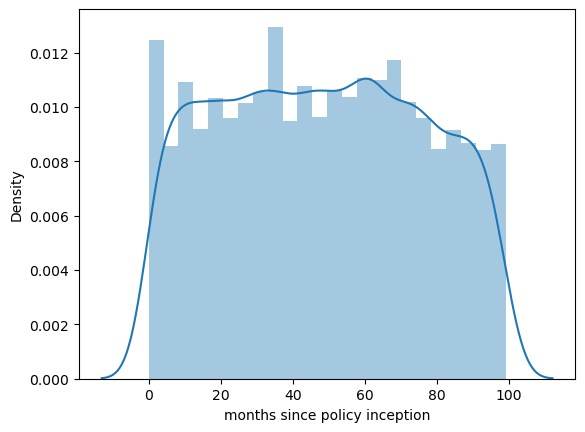

C:\Users\aguva\AppData\Local\Temp\ipykernel_8748\1421801117.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_2_numerical[columns])


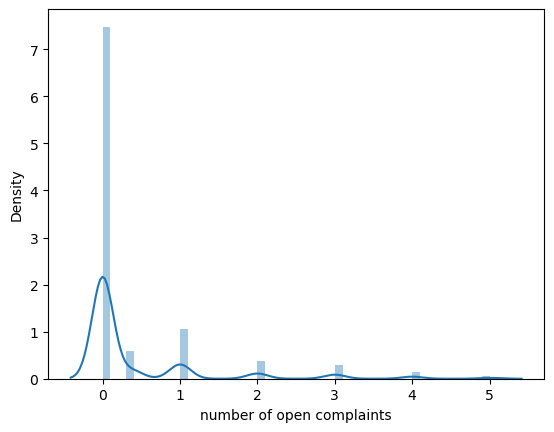

C:\Users\aguva\AppData\Local\Temp\ipykernel_8748\1421801117.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_2_numerical[columns])


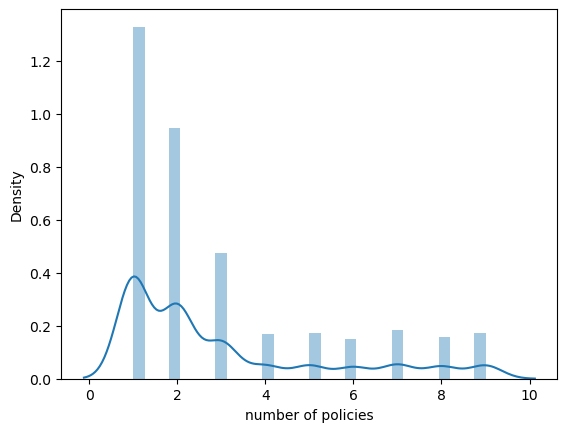

C:\Users\aguva\AppData\Local\Temp\ipykernel_8748\1421801117.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_2_numerical[columns])


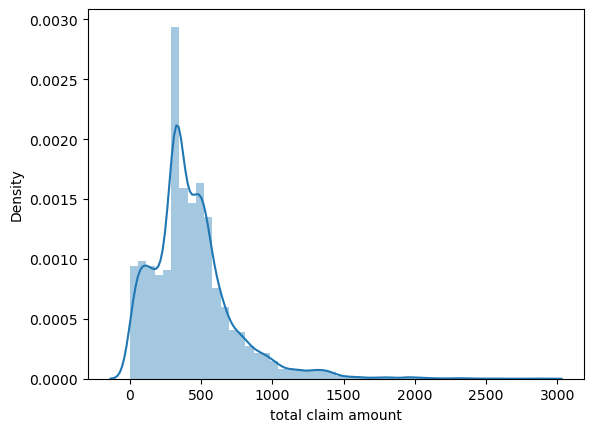

C:\Users\aguva\AppData\Local\Temp\ipykernel_8748\1421801117.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_2_numerical[columns])


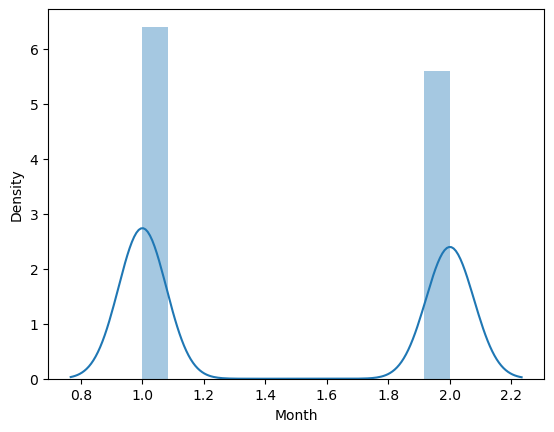

In [36]:
#comprobamos si nuestros datos están skewed: 

for columns in df_2_numerical.columns:
    sns.distplot(df_2_numerical[columns])
    plt.show()

In [40]:
df_2_numerical.head()

,unnamed,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount,Month
0,0,4809.216960,48029,61,7.000000,52,0.000000,9,292.800000,2
1,1,2228.525238,0,64,3.000000,26,0.000000,1,744.924331,1
2,2,14947.917300,22139,100,34.000000,31,0.000000,2,480.000000,2
3,3,22332.439460,49078,97,10.000000,3,0.000000,2,484.013411,1
4,4,9025.067525,23675,117,15.149071,31,0.384256,7,707.925645,1


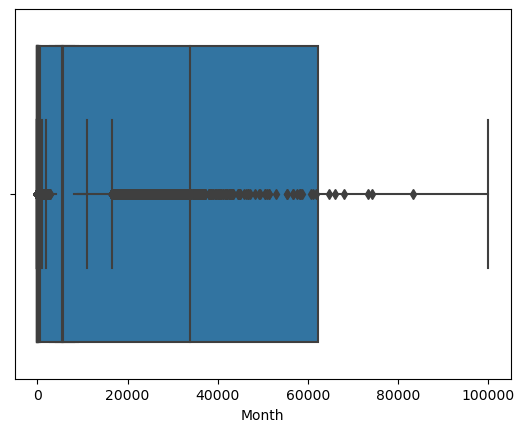

In [44]:
#Observamos los outliers
#for col in df_2_numerical.columns:
#    sns.boxplot(x=df_2_numerical[col])
#No sé porque no puedo generar un boxplot por cada una de las columnas

<Axes: xlabel='customer lifetime value'>

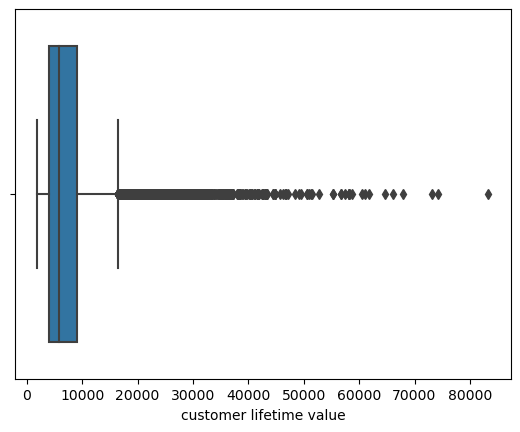

In [46]:
#Observamos los outliers
sns.boxplot(x=df_2_numerical['customer lifetime value'])

C:\Users\aguva\AppData\Local\Temp\ipykernel_8748\2527014504.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_2_numerical['customer lifetime value'])


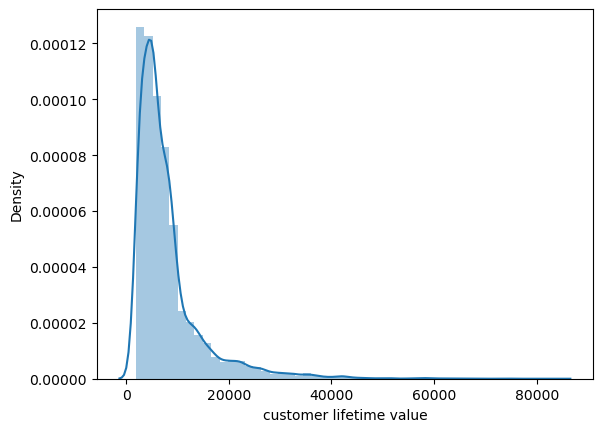

C:\Users\aguva\AppData\Local\Temp\ipykernel_8748\2527014504.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data2['customer lifetime value'])


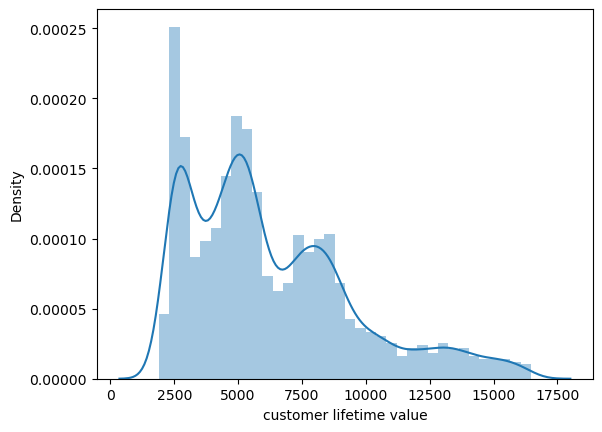

In [47]:
#Eliminamos outliers si nuestra muestra está skewed:

iqr=np.percentile(df_2_numerical['customer lifetime value'],75)-np.percentile(df_2_numerical['customer lifetime value'],25)
#límites estándares son iqr*1,5
upper_limit= np.percentile(df_2_numerical['customer lifetime value'],75)+1.5*iqr
lower_limit= np.percentile(df_2_numerical['customer lifetime value'],25)-1.5*iqr
data2=df_2_numerical[(df_2_numerical['customer lifetime value']>lower_limit)&(df_2_numerical['customer lifetime value']<upper_limit)]
sns.distplot(df_2_numerical['customer lifetime value'])
plt.show()
sns.distplot(data2['customer lifetime value'])
plt.show()

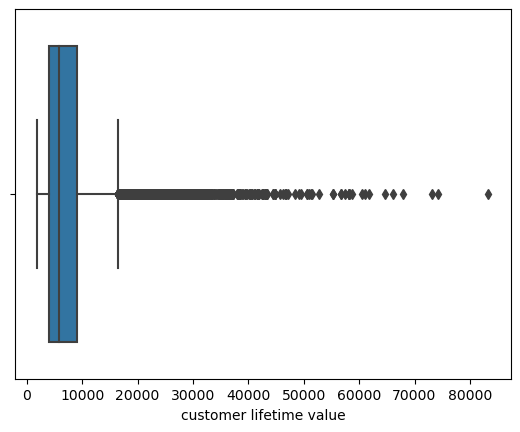

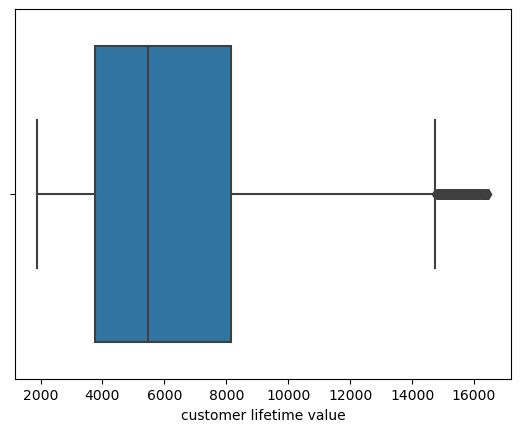

In [48]:
sns.boxplot(x=df_2_numerical['customer lifetime value'])
plt.show()
sns.boxplot(x=data2['customer lifetime value'])
plt.show()

<Axes: xlabel='total claim amount'>

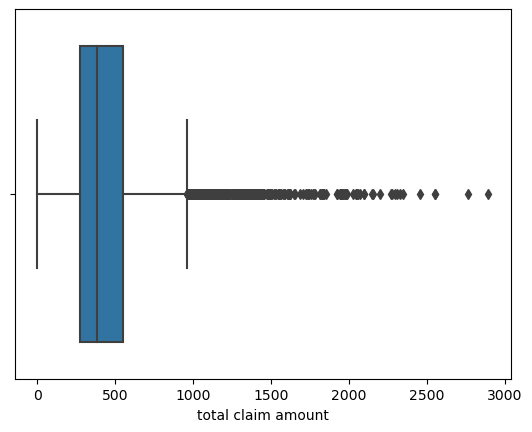

In [49]:
#Realizo el mismo analisis con 'total claim amount' 

#Observamos los outliers
sns.boxplot(x=df_2_numerical['total claim amount'])

C:\Users\aguva\AppData\Local\Temp\ipykernel_8748\3976806716.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_2_numerical['total claim amount'])


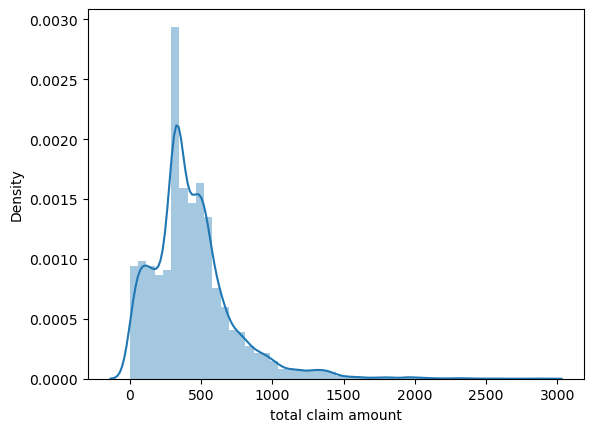

C:\Users\aguva\AppData\Local\Temp\ipykernel_8748\3976806716.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data2['total claim amount'])


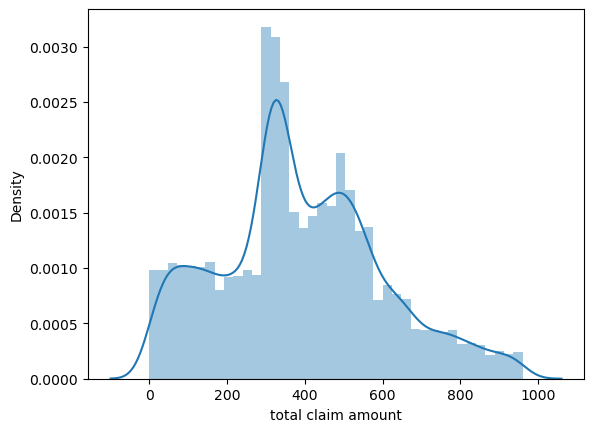

In [50]:
#Eliminamos outliers si nuestra muestra está skewed:

iqr=np.percentile(df_2_numerical['total claim amount'],75)-np.percentile(df_2_numerical['total claim amount'],25)
#límites estándares son iqr*1,5
upper_limit= np.percentile(df_2_numerical['total claim amount'],75)+1.5*iqr
lower_limit= np.percentile(df_2_numerical['total claim amount'],25)-1.5*iqr
data2=df_2_numerical[(df_2_numerical['total claim amount']>lower_limit)&(df_2_numerical['total claim amount']<upper_limit)]
sns.distplot(df_2_numerical['total claim amount'])
plt.show()
sns.distplot(data2['total claim amount'])
plt.show()

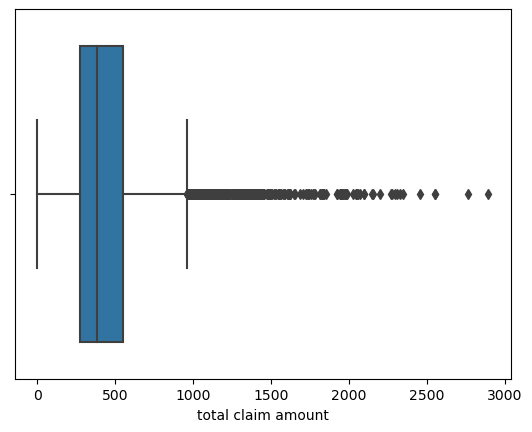

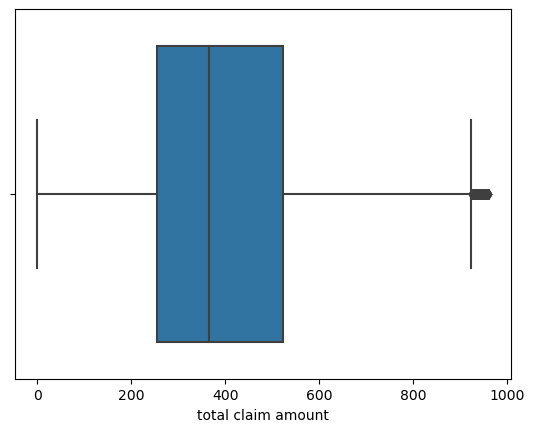

In [51]:
sns.boxplot(x=df_2_numerical['total claim amount'])
plt.show()
sns.boxplot(x=data2['total claim amount'])
plt.show()